In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
from tqdm import tqdm
import pandas as pd
import numpy as np

In [2]:
src_path = Path('/tf/ieee-big-data-cup/shared/trainset.csv')
df = pd.read_csv(src_path,sep=' ')

In [3]:
df

,user_id,user_click_history,user_protrait,exposed_items,labels,time
0,1,"30:1580603130,34:1581178937,15:1581178939,28:1...","64054,21804,80911,36504,8867,7615,54240,37294,...","1,20,28,99,86,119,213,237,164","1,1,1,1,1,1,1,1,1",1582992009
1,2,"20:1580644762,13:1580644765,1:1580644770,127:1...","64054,26565,93755,88510,6344,7615,54240,21927,...","1,4,26,112,86,117,191,234,172","1,1,1,1,1,1,1,1,0",1582992010
2,3,"39:1580772975,6:1580772981,1:1581178309,2:1581...","64054,64086,63021,88510,93500,7615,54240,21927...","22,4,28,48,105,42,193,236,159","1,1,1,0,1,0,0,0,0",1582992014
3,4,"6:1580657608,9:1580657612,15:1580657615,127:15...","64054,21531,6599,16721,37078,7615,54240,65505,...","5,16,1,74,133,122,235,218,172","1,1,1,1,1,1,1,1,0",1582992014
4,5,"37:1580743545,36:1580743554,25:1580743556,37:1...","64054,66036,6599,88510,76066,20543,83978,37294...","6,1,16,85,73,112,239,172,205","1,1,1,1,1,1,1,1,1",1582992017
...,...,...,...,...,...,...
260082,260083,"18:1590866211,29:1590866361,7:1590866364,7:159...","64054,7723,93755,16721,35011,93364,83978,37294...","29,31,25,127,111,93,171,150,196","0,0,0,0,0,0,0,0,0",1593014108
260083,260084,"34:1590594937,15:1590594939,30:1590594941,133:...","64054,46479,34810,36504,7411,11973,83978,93716...","34,14,9,106,114,86,214,154,172","1,1,1,1,1,1,0,0,1",1593014287
260084,260085,"34:1590594937,15:1590594939,30:1590594941,133:...","64054,46479,34810,36504,7411,11973,83978,93716...","28,35,5,110,125,78,218,200,164","1,1,1,1,1,1,0,1,1",1593014307
260085,260086,"28:1591026017,10:1591026019,25:1591026021,132:...","64054,46485,93755,16721,98428,11973,83978,2192...","30,4,22,105,43,129,172,217,238","1,1,1,1,1,1,1,1,0",1593014325


In [4]:
item_purchase_history = [history.split(',') for history in df.user_click_history.values]
item_purchase_history = [item for user_history in item_purchase_history for item in user_history]

In [5]:
df = pd.DataFrame()
df[['item_id','timestamp']] = [item.split(':') for item in item_purchase_history]

In [6]:
item_metadata = []

with tqdm(total=len(df.item_id.unique())) as pbar:
    for item_id in df.item_id.unique():
        item_timestamps = df[df.item_id == item_id].timestamp
        item_metadata.append({
            'item_id': item_id,
            'purchase_total': len(item_timestamps),
            'purchase_start': item_timestamps.min(),
            'purchase_end': item_timestamps.max()
        })
        pbar.update()

100%|██████████| 293/293 [06:04<00:00,  1.24s/it]


In [7]:
df_item_metadata = pd.DataFrame(item_metadata)
for column in ['purchase_total', 'purchase_start', 'purchase_end']:
    df_item_metadata[column] = pd.to_numeric(df_item_metadata[column])
df_item_metadata = df_item_metadata.sort_values(by='purchase_start', ascending=True)
df_item_metadata['purchase_duration'] = df_item_metadata['purchase_end'] - df_item_metadata['purchase_start']

In [10]:
df_item_metadata

,item_id,purchase_total,purchase_start,purchase_end,purchase_duration
153,0,28184,0,0,0
9,35,95681,1580572824,1592834594,12261770
71,39,93147,1580572832,1592882484,12309652
1,34,112362,1580572834,1592907029,12334195
19,1,370354,1580572837,1592918933,12346096
...,...,...,...,...,...
286,370,1,1592270607,1592270607,0
281,275,3,1592353483,1592353483,0
290,303,1,1592406902,1592406902,0
291,334,1,1592669234,1592669234,0


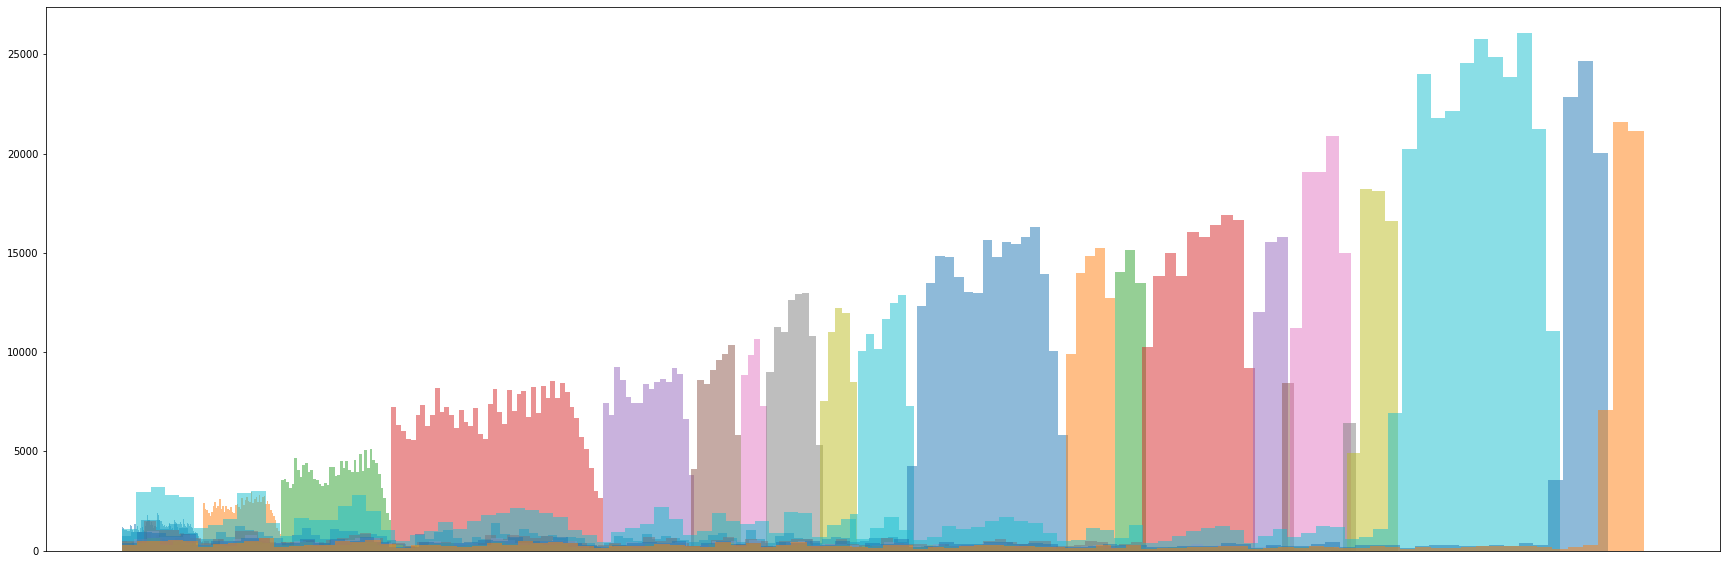

In [8]:
plt.figure(figsize=(30,10))
ax = plt.subplot()
ax.axes.xaxis.set_visible(False)
plt.xticks([])
plt.setp(ax.get_xticklabels(), visible=False)

count = 0
for item_id in df.item_id.unique():
    if item_id != 0:
        item_timestamps = df[df.item_id == item_id].timestamp
        plt.hist(item_timestamps.values, 100, alpha=0.5, label=item_id)
        if count > 20:
            break
        count = count + 1
plt.show()
plt.close()

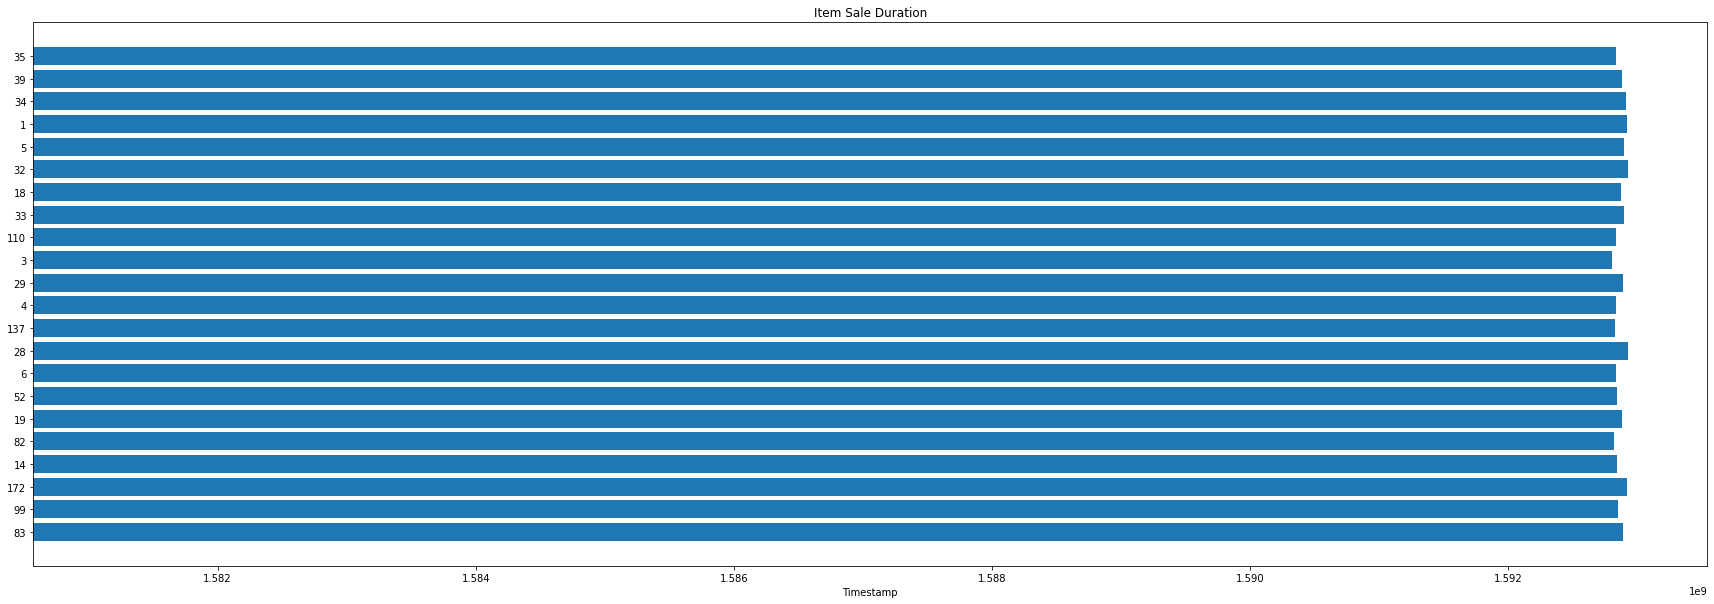

In [9]:
count = 0
x_data = []
x_error = []
y_data = []
for index, item in df_item_metadata.iterrows():
    if item.item_id is not '0':
        y_data.append(item.purchase_end - item.purchase_start)
        x_data.append(item.item_id)
        x_error.append(item.purchase_start)
        if count > 20:
            break
        count = count + 1
y_pos = np.arange(len(x_data))
        
plt.figure(figsize=(30,10))
ax = plt.subplot()

ax.barh(y_pos, y_data, left=x_error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_data)
ax.invert_yaxis()
ax.set_xlabel('Timestamp')
ax.set_title('Item Sale Duration')

plt.show()
plt.close()